# Задание №11. Колебание струны.

<div align="right"><i>Бронников Егор ПМ-1901</i></div>

### Импорт модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

%matplotlib inline

### Начальные параметры

In [2]:
L = 1
dX = 0.1
dT = 0.005
a = 1
m = 200

### Уравнение колебания струны

In [3]:
def oscillation_equation(L=1, dX=0.1, dT=0.005, a=1, *, m=6) -> List[List[float]]:
    """ Метод сеток для решения уравнения колебания струны
        
        :param L: длина струны
        :type L: float
        :param dX: длина шага по оси X
        :type dX: float
        :param dT: длина шага по оси T
        :type dT: float
        :param a: ускорение
        :type a: float
        :param m: количество кривых (с выбранным шагом dT)
        :type m: int
        
        :return: матрица, в которой показано решение уравнения колебания струны
        :rtype: List[List[float]]
    """
    n = int(L/dX) + 1
    coef1 = 1-(a**2*dT**2/dX**2)
    coef2 = a**2*dT**2/dX**2
    u = np.zeros((n,m))
    u[0,:] = 0
    u[n-1,:] = 0
    for x in range(1, n-1):
        u[x,0] = x*dX*(1-x*dX)
    for x in range(1, n-1):
        u[x,1] = u[x,0]
    for t in range(2, m):
        for x in range(1, n-1):
            u[x,t] = u[x,t-1]*2*coef1+coef2*(u[x+1,t-1]+u[x-1,t-1])-u[x,t-2]
    return u

In [4]:
oscillation_equation()[:,0]

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

In [5]:
oscillation_equation()[:,1]

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

### Графики

In [6]:
# help(oscillation_equation)

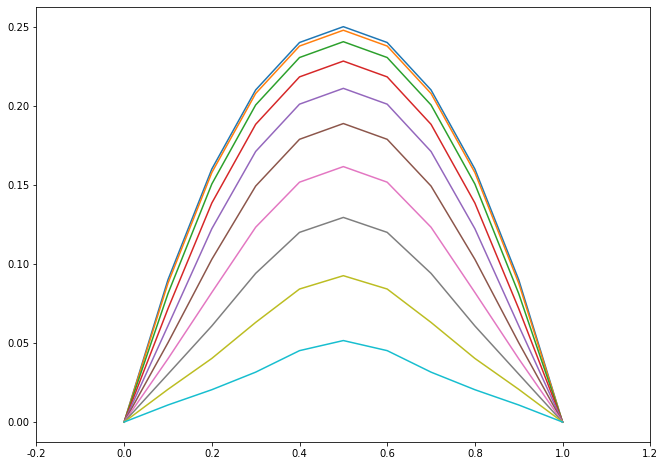

In [9]:
plt.plot(oscillation_equation(L, dX, dT, a, m=m)[:,::10][:,0:10])
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()

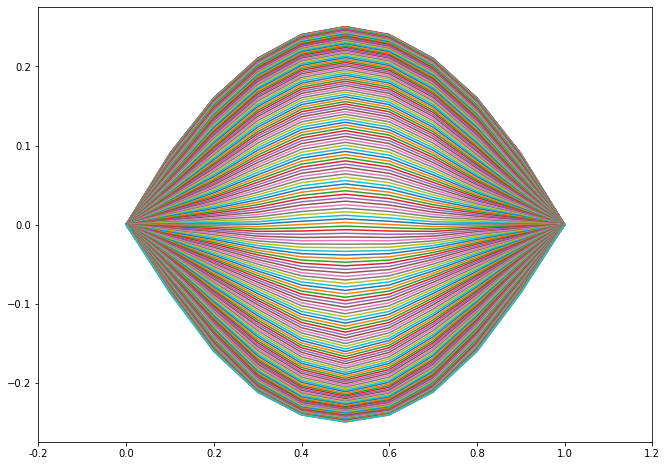

In [8]:
plt.plot(oscillation_equation(L, dX, dT, a, m=m))
labels, _ = plt.xticks()
plt.xticks(labels, map(lambda x: round(x,2), labels*dX))
plt.rcParams["figure.figsize"] = (11,8)
plt.show()